# Fruit Image Classification using MobileNet
This notebook is written and executed by **Dr Raheel Siddiqi** on 15-05-2019. The notebook presents an experiment to classify fruit images using transfer learning. [Fruits 360](https://www.kaggle.com/moltean/fruits) dataset (containing 52262 training images and 17540 test images belonging to 101 fruit classes) has been exploited for the task. The model designed uses **MobileNet** pre-trained model as the convolutional base.

## Tensorflow and Keras version used

In [1]:
import tensorflow as tf
from tensorflow.python import keras

print('Tensorflow Version: ', tf.__version__)
print('Keras Version: ', keras.__version__)

Tensorflow Version:  1.13.1
Keras Version:  2.2.4-tf


## Setting up the Model

In [2]:
from tensorflow.python.keras.applications import MobileNet

conv_base=MobileNet(weights='imagenet',include_top=False,input_shape=(100,100,3))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 32s 2us/step


In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 101, 101, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 50, 50, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 50, 50, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 50, 50, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 50, 50, 32)        128       
__________

In [4]:
import os
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.callbacks import ModelCheckpoint

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(101, activation='softmax'))
filepath="MobileNet_fruit_image_classification_best_model_101_classes.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 3, 3, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dense_1 (Dense)              (None, 101)               51813     
Total params: 7,999,781
Trainable params: 7,977,893
Non-trainable params: 21,888
_________________________________________________________________


## Setting up Training and Validation Data for the experiment

In [6]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Training'

In [7]:
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'

In [8]:
from tensorflow.python.keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])

In [9]:
batch_size=32
number_of_training_samples=52262
number_of_test_samples=17540

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 52262 images belonging to 101 classes.
Found 17540 images belonging to 101 classes.


## Model Training

In [11]:
import math

history = model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=50,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_test_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1634/1634 [==============================] - 902s 552ms/step - loss: 0.3544 - categorical_accuracy: 0.9063 - val_loss: 0.0462 - val_categorical_accuracy: 0.9867
Epoch 2/50
1634/1634 [==============================] - 419s 256ms/step - loss: 0.0651 - categorical_accuracy: 0.9816 - val_loss: 0.0581 - val_categorical_accuracy: 0.9823
Epoch 3/50
1634/1634 [==============================] - 412s 252ms/step - loss: 0.0638 - categorical_accuracy: 0.9834 - val_loss: 0.0320 - val_categorical_accuracy: 0.9902
Epoch 4/50
1634/1634 [==============================] - 405s 248ms/step - loss: 0.0461 - categorical_accuracy: 0.9884 - val_loss: 0.0288 - val_categorical_accuracy: 0.9916
Epoch 5/50
1634/1634 [==============================] - 398s 244ms/step - loss: 0.0468 - categorical_accuracy: 0.9887 - val_loss: 0.0639 - val_categorical_accuracy: 0.9863
Epoch 6/50
1634/1634 [==============================] - 395s 242ms/step - loss: 0.0362 - cat

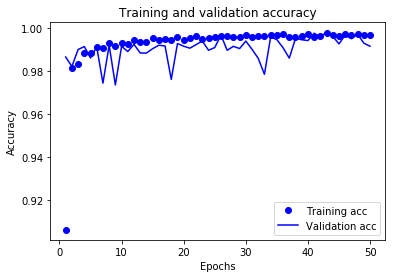

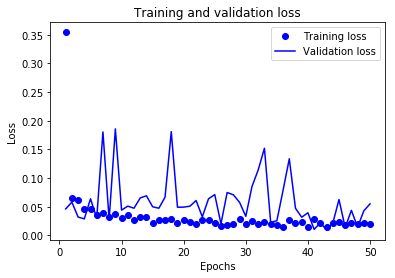

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_transfer learning_MobileNet_data augmentation_a',format='png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_transfer learning_MobileNet_data augmentation_b',format='png')
plt.show()

## Loading the Best Model

In [13]:
from tensorflow.python.keras.models import load_model

best_model = load_model('MobileNet_fruit_image_classification_best_model_101_classes.h5')

## Evaluating the Best Model

In [14]:
steps_test=int(17540/32)
result = best_model.evaluate_generator(validation_generator, steps=steps_test,verbose=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

549/549 [==============================] - 39s 71ms/step - loss: 0.0096 - categorical_accuracy: 0.99820s - loss: 0.0097 - categorical_accuracy - ETA: 0s - loss: 0.0096 - categorical_accuracy: 0.
Test-set classification accuracy: 99.82%


## Predicting labels for Fruit Images

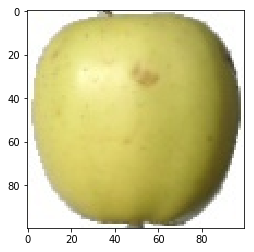

1/1 [==============================] - 1s 528ms/sample
True label: Apple Golden 2
Predicted label: Apple Golden 2


In [15]:
import matplotlib.pyplot as plt
import cv2
import os
%matplotlib inline

TEST_DIR='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'
CATEGORIES=[]
for category in os.listdir(TEST_DIR):
    CATEGORIES.append(category)
img_array = cv2.imread('99_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Apple Golden 2')
print('Predicted label:',pred_name)

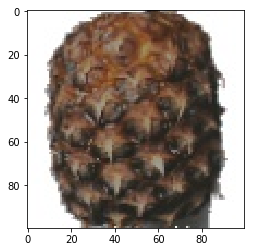

1/1 [==============================] - 0s 4ms/sample
True label: Pineapple
Predicted label: Pineapple


In [16]:
img_array = cv2.imread('214_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Pineapple')
print('Predicted label:',pred_name)

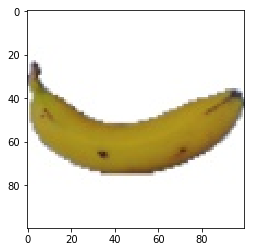

1/1 [==============================] - 0s 4ms/sample
True label: Banana
Predicted label: Banana


In [17]:
img_array = cv2.imread('110_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Banana')
print('Predicted label:',pred_name)

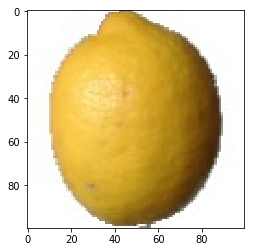

1/1 [==============================] - 0s 4ms/sample
True label: Lemon
Predicted label: Lemon


In [18]:
img_array = cv2.imread('63_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Lemon')
print('Predicted label:',pred_name)

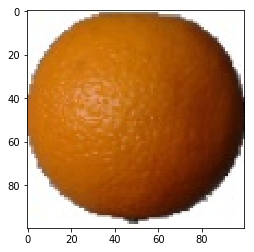

1/1 [==============================] - 0s 4ms/sample
True label: Orange
Predicted label: Orange


In [19]:
img_array = cv2.imread('60_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Orange')
print('Predicted label:',pred_name)

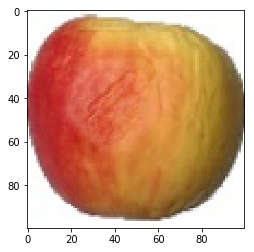

1/1 [==============================] - 0s 4ms/sample
True label: Apple Red Yellow 1
Predicted label: Apple Red Yellow 1


In [20]:
img_array = cv2.imread('64_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Apple Red Yellow 1')
print('Predicted label:',pred_name)

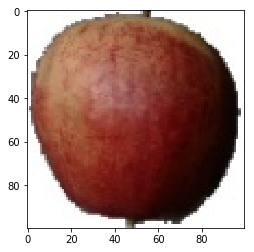

1/1 [==============================] - 0s 4ms/sample
True label: Apple Red 3
Predicted label: Apple Red 3


In [21]:
img_array = cv2.imread('4_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Apple Red 3')
print('Predicted label:',pred_name)

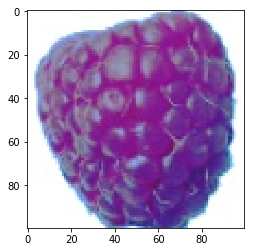

1/1 [==============================] - 0s 4ms/sample
True label: Raspberry
Predicted label: Raspberry


In [22]:
img_array = cv2.imread('77_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Raspberry')
print('Predicted label:',pred_name)

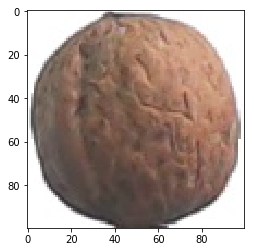

1/1 [==============================] - 0s 4ms/sample
True label: Walnut
Predicted label: Walnut


In [23]:
img_array = cv2.imread('12_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Walnut')
print('Predicted label:',pred_name)

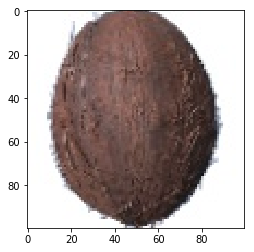

1/1 [==============================] - 0s 4ms/sample
True label: Cocos
Predicted label: Cocos


In [24]:
img_array = cv2.imread('0_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Cocos')
print('Predicted label:',pred_name)